## Word-level one-hot encoding (toy example)

In [15]:
import numpy as np

# This is our initial data; one entry per "sample"
# (in this toy example, a "sample" is just a sentence, but
# it could be an entire document).
samples = ['The cat sat on the mat.', 'The dog ate my homework.'] #데이터 

# First, build an index of all tokens in the data.
token_index = {}
for sample in samples: #samples는 2개의 원소를 가지는 array(2개의 문장)
    # We simply tokenize the samples via the `split` method. 
    # In real life, we would also strip punctuation and special characters from the samples.
    sample = "".join([c for c in sample if c not in ('!', '?', '.', ',')]) #join:token을 붙힘 #특수문자 제외 
    for word in sample.split(): #공백을 구분자로 단어 parsing 
        if word not in token_index:
            # Assign a unique index to each unique word
            token_index[word] = len(token_index) + 1 #단어 순서대로 숫자 부여 
            # Note that we don't attribute index 0 to anything.
          
print(type(token_index))
print(token_index)

<class 'dict'>
{'ate': 8, 'homework': 10, 'sat': 3, 'the': 5, 'my': 9, 'mat': 6, 'cat': 2, 'dog': 7, 'The': 1, 'on': 4}


In [17]:
word = 'mat'
print(token_index.get(word))

6


In [18]:
# Next, we vectorize our samples.
# We will only consider the first `max_length` words in each sample.
max_length = 10

# This is where we store our results:
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1)) ##3가지 의미 중요##
#result는 3차원 tensor (2,10,11): column 11, row 10인 tensor가 2개! #top 10개 단어만 임베딩하겠다!
for i, sample in enumerate(samples):
    sample = "".join([c for c in sample if c not in ('!', '?', '.', ',')]) #특수문자 제거
    for j, word in list(enumerate(sample.split()))[:max_length]: #parsing -> parsing한 단어에 대해 순번 매김 -> list화(순번+단어=원소1)
        index = token_index.get(word) #word가 token_index에서 몇번인지 알 수 ㅇ
        print(i, j, word, index)
        results[i, j, index] = 1.#0번째 tensor의 0번째 행 index 1에다가 1마킹
        
print(results) #단어 하나가 1D tensor로 표현됨(one-hot encoded). 문장 하나가 2차원 tensor 하나! 

0 0 The 1
0 1 cat 2
0 2 sat 3
0 3 on 4
0 4 the 5
0 5 mat 6
1 0 The 1
1 1 dog 7
1 2 ate 8
1 3 my 9
1 4 homework 10
[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


## Word-level one-hot encoding (toy example)

In [19]:
# Next, we vectorize our samples.
# We will only consider the first `max_length` words in each sample.
max_length = 10

# This is where we store our results:
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    sample = "".join([c for c in sample if c not in ('!', '?', '.', ',')])
    for j, word in enumerate(sample.split()):
        index = token_index.get(word)
        results[i, j, index] = 1.
        
print(results)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


## Character-level one-hot encoding (toy example)

In [37]:
import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
print(characters)
print(len(characters))

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	

100


In [47]:
token_index = dict(zip(characters, range(1, len(characters) + 1)))
print(token_index)
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        #print(i, j, character, index)
        results[i, j, index] = 1.
        
print(results)
print(results[0][0])

{'L': 48, 'n': 24, 'w': 33, 'S': 55, '\n': 97, 'q': 27, 'B': 38, '-': 75, '=': 81, 'Q': 53, '\x0c': 100, 'a': 11, 'D': 40, '!': 63, '}': 93, ' ': 95, 'U': 57, '{': 91, 'e': 15, '&': 68, 'W': 59, 'X': 60, '4': 5, '5': 6, 'Y': 61, 'K': 47, '^': 88, '(': 70, '%': 67, 'i': 19, 'f': 16, '?': 83, '*': 72, 'E': 41, '/': 77, 'v': 32, '1': 2, '.': 76, ')': 71, ';': 79, '@': 84, '#': 65, '"': 64, 'h': 18, '\x0b': 99, 'm': 23, ':': 78, '0': 1, 'N': 50, '6': 7, '\r': 98, '9': 10, '[': 85, '~': 94, 'p': 26, 'k': 21, 'J': 46, 'g': 17, 's': 29, 'j': 20, ',': 74, '`': 90, 'F': 42, 'o': 25, 'c': 13, 'O': 51, '>': 82, 'C': 39, 'l': 22, '7': 8, '+': 73, 'I': 45, 'z': 36, 'd': 14, "'": 69, 'P': 52, '\t': 96, 'T': 56, 'G': 43, 'A': 37, '_': 89, '$': 66, 'u': 31, '2': 3, 'M': 49, '<': 80, 't': 30, ']': 87, '3': 4, 'b': 12, '\\': 86, '8': 9, '|': 92, 'Z': 62, 'R': 54, 'x': 34, 'y': 35, 'r': 28, 'H': 44, 'V': 58}
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. .

## Using Keras for word-level one-hot encoding

In [49]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# We create a tokenizer, configured to only take into account the top-1000 most common words
tokenizer = Tokenizer(num_words=100) #token화 준비: 100개까지 등록 단어로 하겠다 
# This builds the word index
tokenizer.fit_on_texts(samples) #실제 samples data의 token을 뽑아냄 

# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(samples) #텍스트 숫자로 변환됨 (순서 번호 부여)
print(sequences)

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]


In [54]:
# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='count') #count: 단어의 frequeny넣음 #binary면 0or1
print(one_hot_results) #0번째 다어는 0번, 1번째 단어는 1번 등장하는 것을 보여줌 

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print(word_index)

[[0. 2. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]
Found 9 unique tokens.
{'ate': 7, 'homework': 9, 'sat': 3, 'the': 1, 'my': 8, 'cat': 2, 'dog': 6, 'mat': 5, 'on': 4}


In [69]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
dimensionality = 1000 #1000개 단어에 대한 onehot
max_length = 10
results = np.zeros((len(samples), max_length, dimensionality)) #column 1000 row 10인 2d tensor가 2개 
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality #hash uniform분포를 가지는 정수 리턴 -> index가 중복 안되도록 만들어줌 
        results[i, j, index] = 1.

In [70]:
print(results.shape)
print(results[0][0])

(2, 10, 1000)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

## Word Embedding

In [71]:
import keras
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64) #1000:등록된 단어의 개수 64:embedding vector의 차원 수(프린트에서는 2)=hidden layer의 노드가 64개 

In [72]:
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_features = 10000 #상위 1000개 단어를 feature로 설정 
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 20 #각 문서의 앞 20개 단어만을 조회 

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# This turns our lists of integers into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [76]:
print(x_train.shape)
print(x_train[0]) #20개 단어에 대한 등록 번호 
print(x_train[1])

(25000, 20)
[  65   16   38 1334   88   12   16  283    5   16 4472  113  103   32
   15   16 5345   19  178   32]
[  23    4 1690   15   16    4 1355    5   28    6   52  154  462   33
   89   78  285   16  145   95]


In [77]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen)) #10000차원을 가지는 one-hot encoding vector가 들어옴 8차원의 word embedding vector가 만들어짐
#input_length=maxlen각 문서에서 20개 단어만 보겠다  maxlen: 추출단어수  #10000 8 20이 무엇을 의미하는지 구별할 것!
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.
#하나의 단어에 대해서 8차원 벡터가 만들어짐x20개 단어를 만듬 -> 2D tensor --> 이것을 NN에 넣을 것임!(20X8=160개 노드를 가지는!)
# We flatten the 3D tensor of embeddings  into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid')) #IMDB는 긍정 OR 부정을 판단하는 데이터이므로 1!
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
##160개의 노드를 가지는 input layer - 1개의 노드를 가지는 output layer -> 각 노드의 확률값이 0.5이상이면 긍, 이하면 부 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 53us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 1s 50us/step - loss: 0.5658 - acc: 0.7425 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 1s 42us/step - loss: 

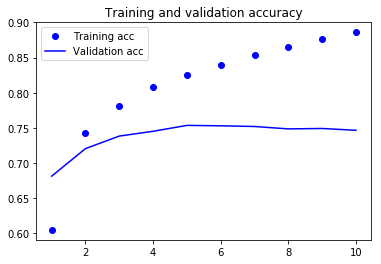

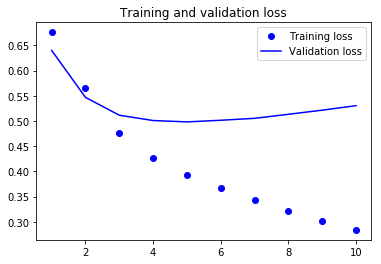

In [80]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Putting it all together: from raw text to word embeddings¶

In [41]:
# head to http://ai.stanford.edu/~amaas/data/sentiment/ and 
# download the raw IMDB dataset (if the URL isn't working anymore, just Google "IMDB dataset"). Uncompress it.
import os

#imdb_dir = '/home/ubuntu/data/aclImdb'
imdb_dir = 'C:/Temp/aclImdb_v1/aclImdb' #train과 test folder -> train folder안에 pos, neg folder존재 

train_dir = os.path.join(imdb_dir, 'train') #train folder 지정 

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type) #label type: pos/neg
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), 'rt', encoding='UTF8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0) #negative면 0 문서가 100개라고 한다면 문서 각각의 단어에 0 or1!
            else:
                labels.append(1)

## Tokenize the data

In [68]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut reviews after 100 words
training_samples = 2000  # We will be training on 200 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)  ##이게 뭐라고? 각 단어에 해당하는 정수 코드를 부여 #이 변수는 해당문서가 정수화된 값을 포함하고 있음 

word_index = tokenizer.word_index #dict type임 #tokenize객체 안에 word_index #getting은 394번 처럼 각 단어마다 unique code 가짐
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen) #100개 단어에 대해서만  #한 줄이 하나의 문서(25000개의 문서에 대해서 각 문서마다 100개의 단어에 대해 정수값!)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)  ##결과 뭔지 알기!!!!
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0]) #25000 #0~24999까지 정수를 가지는 array가 생김 
np.random.shuffle(indices)  #학습의 효과를 얻기 위해 랜덤성 필요 
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]  #array를 train과 validate으로 구분 
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


## Download the GloVe word embeddings

### Head to https://nlp.stanford.edu/projects/glove/ (where you can learn more about the GloVe algorithm), and
### download the pre-computed embeddings from 2014 English Wikipedia. 
### It's a 822MB zip file named glove.6B.zip, containing 100-dimensional embedding vectors for 400,000 words (or non-word tokens). Un-zip it.

In [51]:
import os
import numpy as np

# glove_dir = 'C:/Temp/home/ubuntu/data/'
glove_dir = 'C:/Temp/glove.6B' #아주 많은 단어에 대한 임베딩 벡터를 포함하고 있는 파일 

#open('파일경로.txt', 'rt', encoding='UTF8')

#각 단어가 100차원으로 각각 임베딩 된 것이 텍스트로 있는 상태. -> 한 줄씩 가져와 메모리에 쌓는다!
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), 'rt', encoding='UTF8') #encoding! #text를 한 단어씩 잘라서 넣음 
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs #단어에 대한 벡터가 key value로 들어감! #각 단어에 대한 벡터가 포함되어있음 
f.close()

print('Found %s word vectors.' % len(embeddings_index))
##이미 학습되어진 glove embedding으로 갈아끼워서 imdb를 분류하고자 한다!

Found 400000 word vectors.


In [62]:
print(embeddings_index['university'].shape)
embeddings_index['university'] #100차원으로 임베딩된 단어가 엄청 많은데, 그 중 university에 대해서 본 것 

(100,)


array([ 0.6958   , -0.19334  , -0.78134  , -0.45589  ,  0.29245  ,
        0.36482  ,  0.42036  ,  0.39444  , -0.82601  ,  0.95148  ,
       -0.57458  , -0.60882  ,  0.17639  ,  1.2112   , -0.40965  ,
       -0.30992  ,  1.036    ,  0.14459  , -0.66125  , -0.15301  ,
       -0.60274  ,  0.43769  ,  0.09964  ,  0.084613 , -0.13351  ,
       -0.66612  ,  0.30282  , -1.2281   ,  0.20226  , -0.025091 ,
       -1.0822   ,  1.2366   ,  0.027486 ,  0.49969  , -1.3037   ,
       -0.52735  , -0.72448  ,  0.64823  , -1.0533   , -0.051606 ,
       -1.1125   , -0.21037  , -0.86862  , -0.55893  , -0.12559  ,
       -0.16766  ,  1.2164   ,  0.68335  ,  0.0060452,  0.28108  ,
        0.42866  , -1.0092   ,  0.40758  , -0.19904  , -0.5442   ,
       -2.7965   , -0.11892  , -0.98139  ,  1.0011   ,  0.13492  ,
       -0.16678  ,  0.4366   , -0.022247 , -0.30683  ,  0.26983  ,
        0.18009  , -0.12419  ,  1.1771   ,  0.90273  ,  1.6263   ,
       -0.20432  ,  0.33125  ,  0.2568   , -0.23611  , -0.8155

In [69]:
# Number of words to consider as features  
max_words = 10000
max_features = 10000

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))  # imdb에 존재하는 각 단어에 대한 임베딩 벡터를 glove에서 가져와서 모아놓은 결과!
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)  #그 word에 해당하는 임베딩 벡터를 가져온 내용이 embedding_vector에 들어감 
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector #i번째 행에 가져온 임베딩 벡터를 넣겠다. 
            #imdb에 존재하는 각단어에 대해서 i번째 code를 가지면 i번째 행에다가 glove에서 가져온 벡터를 배치시킴
            #i번째 행을 가지고 imdb를 긍/부 로 분류! 

## Model Definition

In [70]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen)) #embedding layer를 통해 나온 2d layer #glove라고 하는 embedding vector를 넣은 것!
model.add(Flatten()) #2d tensor를 flatten 
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #긍or부이므로 sigmoid
model.summary()  #embedding matrix 값 param 100*10000 = 1000000

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


### Load the GloVe embeddings in the model

In [71]:
model.layers[0].set_weights([embedding_matrix]) #embedding_matrix: glove에서 학습되어진 데이터 #0번째 layer에 넣어서 weight setting 
#단어를 2차원벡터로 임베딩하는 부분을 glove에서 해가지고 가져온대!-> 이 부분 바꿔줘야함 
#첫번째 layer에 embedding_matrix를 넣어 !
model.layers[0].trainable = False #0번째 weight는 바뀌지 못하도록 억제 glove에서 받은 그대로 쓰기 위함! 

### Train and Evaluate

In [72]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_val, y_val))
# model.save_weights('pre_trained_glove_model.h5')

Train on 2000 samples, validate on 10000 samples
Epoch 1/20
2000/2000 [==============================] - 2s 895us/step - loss: 0.8305 - acc: 0.4990 - val_loss: 0.6932 - val_acc: 0.4969
Epoch 2/20
2000/2000 [==============================] - 1s 569us/step - loss: 0.7016 - acc: 0.5075 - val_loss: 0.6936 - val_acc: 0.4955
Epoch 3/20
2000/2000 [==============================] - 1s 658us/step - loss: 0.6929 - acc: 0.5500 - val_loss: 0.7303 - val_acc: 0.5029
Epoch 4/20
2000/2000 [==============================] - 1s 575us/step - loss: 0.6471 - acc: 0.6155 - val_loss: 0.7046 - val_acc: 0.4960
Epoch 5/20
2000/2000 [==============================] - 1s 685us/step - loss: 0.5698 - acc: 0.6965 - val_loss: 0.8742 - val_acc: 0.4964
Epoch 6/20
2000/2000 [==============================] - 1s 635us/step - loss: 0.4826 - acc: 0.7750 - val_loss: 1.1408 - val_acc: 0.5026
Epoch 7/20
2000/2000 [==============================] - 1s 563us/step - loss: 0.4067 - acc: 0.8190 - val_loss: 0.9051 - val_acc: 0.4964

In [57]:
print(history.history)
print(x_val.shape)

{'acc': [0.57, 0.71, 0.755, 0.795, 0.835, 0.915, 0.99, 1.0, 0.995, 0.88, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.905], 'loss': [2.0046400928497317, 0.6040195894241333, 0.5003915774822235, 0.44238714456558226, 0.3296855878829956, 0.29824037075042725, 0.15049240946769715, 0.06886369556188583, 0.06963018238544465, 0.33215880058705805, 0.025890664607286454, 0.01709282398223877, 0.013666155263781548, 0.007546776123344898, 0.005522845275700092, 0.003708655945956707, 0.0028366991132497787, 0.001907289195805788, 0.0016568055748939514, 0.5747667940054089], 'val_acc': [0.4977, 0.4967, 0.494, 0.5061, 0.5059, 0.5068, 0.5112, 0.4997, 0.494, 0.5162, 0.5172, 0.5162, 0.5108, 0.5125, 0.5137, 0.5127, 0.5155, 0.5109, 0.5172, 0.5147], 'val_loss': [0.7151624618530273, 0.7589613424301147, 1.5832448808670043, 1.1000429830551148, 1.3884089136123656, 0.9310759801864624, 0.7967673076629639, 1.3659975982666015, 4.088796829986572, 0.8383270780563354, 0.87339387216568, 0.8993906516075134, 0.9695606649398804

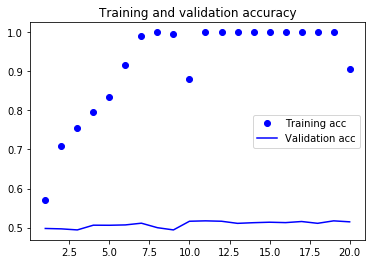

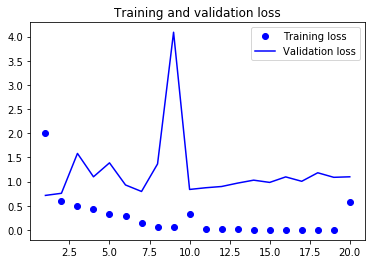

In [59]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Without the pre-trained model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## for Test Data

In [ ]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)